<a href="https://colab.research.google.com/github/CRISTIANJULIOCESAR/DANN/blob/main/sin_el_dann_cv_shaps_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob

def clear_previous_features(directory):
    # Eliminar todos los archivos .pkl en el directorio especificado
    files = glob.glob(os.path.join(directory, '*.pkl'))
    for f in files:
        try:
            os.remove(f)
            print(f'Eliminado: {f}')
        except Exception as e:
            print(f'No se pudo eliminar {f}. Error: {str(e)}')

# Directorio donde guardas las características
save_dir = "/content/drive/MyDrive/PANCANCER FINAL"

# Llamada a la función para limpiar los archivos previos
clear_previous_features(save_dir)


In [3]:
import os

# Obtener el número de núcleos
num_cores = os.cpu_count()
print(f"Número de núcleos de CPU: {num_cores}")


Número de núcleos de CPU: 12


In [4]:
import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU en uso: {gpu_name}")
    print(f"Memoria total de la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("No se encontró una GPU disponible.")


GPU en uso: NVIDIA L4
Memoria total de la GPU: 22.17 GB


In [5]:
!pip install umap-learn shap
!pytorch-lamb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
/bin/bash: line 1: pytorch-lamb: command not found


In [6]:
import pandas as pd
clinicos = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/meta_sinFPPP.pkl')
clinicos

,Unnamed: 0,data_type,updated_datetime,file_name,md5sum,data_category,experimental_strategy,project,sample_uuid,sample_barcode,...,panel,histology,tissue_site,stage,T,N,M,residual_tumor,new_tumor_events,follow_ups
file_id,,,,,,,,,,,,,,,,,,,,,
9fe7d0f4-866d-490f-b2cb-d9be7da889de,7001,Gene Expression Quantification,2016-05-26T20:51:28.753650-05:00,1db2cfc5-346d-4398-9dd4-8b92435059fd.htseq.cou...,bff9318f04ad067bccc0fbd2d31b45f1,Transcriptome Profiling,RNA-Seq,TCGA,9259e9ee-7279-4b62-8512-509cb705029c,TCGA-DD-AAVP-01A,...,LIHC,Hepatocellular Carcinoma,Liver,Stage I,T1,N0,M0,R0,2.0,1.0
dd74434f-300f-4798-8342-aad31b192e12,8001,Gene Expression Quantification,2016-05-26T21:04:47.187859-05:00,5f4cf592-e135-43ff-9c11-bcba462626d3.htseq.cou...,92cf7b5b7f0a0f5dfa02919c586b72c7,Transcriptome Profiling,RNA-Seq,TCGA,bccb7f9d-8dde-45b7-a50d-6c7233239ceb,TCGA-KK-A7B2-01A,...,PRAD,Prostate Adenocarcinoma Acinar Type,Prostate,NaN,T3a,N1,NaN,R0,2.0,1.0
07db9e9d-059d-4e6c-b483-81517a492b96,1001,Gene Expression Quantification,2016-05-26T21:04:48.015693-05:00,aa4a76e4-5348-479c-8beb-3e4e34e18ce9.htseq.cou...,503fa39eb3a770b869ab0c4297fd0d43,Transcriptome Profiling,RNA-Seq,TCGA,03877fe0-b0d6-4800-be46-b45c70350e48,TCGA-DC-6158-01A,...,READ,Rectal Adenocarcinoma,Rectum,Stage I,T2,N0,M0,R0,3.0,2.0
47ee860a-fd18-48f2-bfe7-4e19391950bd,2001,Gene Expression Quantification,2016-05-26T21:04:48.692729-05:00,0c172934-64ff-44dc-bdba-4c738f5692ea.htseq.cou...,c61b88a22488a1a0d2fb3e7739db0b32,Transcriptome Profiling,RNA-Seq,TCGA,8d3e521b-6df4-4633-bb44-7647ded94130,TCGA-DD-A4NP-01A,...,LIHC,Hepatocellular Carcinoma,Liver,Stage I,T1,N0,M0,R0,3.0,2.0
e322b0e5-458a-4cbf-a64f-9b348e413939,5001,Gene Expression Quantification,2016-05-26T21:04:49.266949-05:00,3025ad45-1d29-4c05-b90f-3d4a348c82c6.htseq.cou...,d279845ef0505630cf5a2ee4b1be5cac,Transcriptome Profiling,RNA-Seq,TCGA,8fef5013-4e57-4043-8770-a56135aeac9b,TCGA-HQ-A5ND-01A,...,BLCA,Muscle invasive urothelial carcinoma (pT2 or a...,Bladder,Stage IV,T3b,N1,M0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3999,Gene Expression Quantification,2016-06-01T23:31:30.205560-05:00,1ef78255-1b5c-42af-aa81-128c1b009114.htseq.cou...,4e139effd7c17a3b6f8c8a2dcf1ba2f5,Transcriptome Profiling,RNA-Seq,TCGA,f03d9b83-a4d7-4e77-abaa-5c3dbee0bcf3,TCGA-BP-4790-01A,...,KIRC,Kidney Clear Cell Renal Carcinoma,Kidney,Stage I,T1a,NX,M0,NaN,2.0,1.0
673a85f3-ba5e-448a-acee-dfec77b5238e,8000,Gene Expression Quantification,2016-06-01T23:31:30.867514-05:00,d07c7238-807f-48b1-bf06-deaa6200f4aa.htseq.cou...,b07dddd077d9db4f26b3e2ae066555c4,Transcriptome Profiling,RNA-Seq,TCGA,d90a2617-bf0b-453f-a483-ceac82781a6c,TCGA-N9-A4Q4-01A,...,UCS,Uterine Carcinosarcoma/ Malignant Mixed Muller...,Uterus,NaN,NaN,NaN,NaN,R0,1.0,0.0
3d93b2ae-7730-4914-af23-ff3554752922,9000,Gene Expression Quantification,2016-06-01T23:31:31.468195-05:00,3c5b65ad-998a-4124-814f-760de89f05d0.htseq.cou...,2046f591b06fa9eafb79d667f7942795,Transcriptome Profiling,RNA-Seq,TCGA,bf8e8426-dc44-40b0-8459-ad1dbaf9ba5a,TCGA-RY-A847-01A,...,LGG,Oligodendroglioma,Central nervous system,NaN,NaN,NaN,NaN,NaN,2.0,1.0


In [7]:
df = pd.read_pickle('/content/drive/MyDrive/pan_cancer_diner/final/Pan Cancer/Validados/picklesnuevos/df_sinFPPP_2.pkl')
df

,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196
9fe7d0f4-866d-490f-b2cb-d9be7da889de,0,0,79,1055,12,3291,6614,11,0,0,...,5,0,557,3130,0,314,469,0,0,3
dd74434f-300f-4798-8342-aad31b192e12,1,0,1250,8,51,3,24510,55,120,0,...,73,0,963,10619,0,1656,1146,0,0,3
07db9e9d-059d-4e6c-b483-81517a492b96,0,0,41,2,35,1618,21227,29,1,0,...,5,0,2136,13793,0,3667,2641,0,0,3
47ee860a-fd18-48f2-bfe7-4e19391950bd,0,0,111,16482,328,10632,159168,124,1,0,...,66,0,3417,887,0,1822,1891,0,0,1
e322b0e5-458a-4cbf-a64f-9b348e413939,2,0,22,2,0,2,7488,18,1714,0,...,52,0,2155,13427,0,1404,2215,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3,0,52,14,76,2971,111008,92,6,0,...,28,0,3969,11102,0,4381,2584,0,0,1
673a85f3-ba5e-448a-acee-dfec77b5238e,3,0,169,40,142,4,25243,27,277,0,...,172,0,2717,14657,0,1090,2165,0,0,3
3d93b2ae-7730-4914-af23-ff3554752922,0,1,3961,10,54,3,32550,26,289,1,...,2,0,2568,4216,0,3239,908,0,0,1
85a0b88f-2b89-4117-9e04-b81fad7f2e1b,9,1,1003,90,272,0,331,96,55,0,...,10,0,1611,19604,0,7247,3970,0,0,13


In [8]:
clinicos = clinicos.dropna(subset=['vital'])
clinicos = clinicos.dropna(subset=['panel'])

In [9]:
df['vital'] = clinicos['vital']
df['panel'] = clinicos['panel']

In [10]:
df = df.dropna(subset=['vital'])
df = df.dropna(subset=['panel'])

In [11]:
clinicos['panel'].unique()

array(['LIHC', 'PRAD', 'READ', 'BLCA', 'LGG', 'BRCA', 'UCEC', 'SARC',
       'KIRC', 'PCPG', 'DLBC', 'MESO', 'THYM', 'LUSC', 'LUAD', 'STAD',
       'GBM', 'LAML', 'THCA', 'CESC', 'COAD', 'HNSC', 'UVM', 'SKCM',
       'PAAD', 'OV', 'TGCT', 'KICH', 'ESCA', 'KIRP', 'ACC', 'CHOL', 'UCS'],
      dtype=object)

In [12]:
df

,5S_rRNA,5_8S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,...,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196,vital,panel
9fe7d0f4-866d-490f-b2cb-d9be7da889de,0,0,79,1055,12,3291,6614,11,0,0,...,557,3130,0,314,469,0,0,3,Alive,LIHC
dd74434f-300f-4798-8342-aad31b192e12,1,0,1250,8,51,3,24510,55,120,0,...,963,10619,0,1656,1146,0,0,3,Alive,PRAD
07db9e9d-059d-4e6c-b483-81517a492b96,0,0,41,2,35,1618,21227,29,1,0,...,2136,13793,0,3667,2641,0,0,3,Dead,READ
47ee860a-fd18-48f2-bfe7-4e19391950bd,0,0,111,16482,328,10632,159168,124,1,0,...,3417,887,0,1822,1891,0,0,1,Alive,LIHC
e322b0e5-458a-4cbf-a64f-9b348e413939,2,0,22,2,0,2,7488,18,1714,0,...,2155,13427,0,1404,2215,0,0,4,Dead,BLCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62cb41b1-8960-4fa2-8f74-38dd174af004,3,0,52,14,76,2971,111008,92,6,0,...,3969,11102,0,4381,2584,0,0,1,Dead,KIRC
673a85f3-ba5e-448a-acee-dfec77b5238e,3,0,169,40,142,4,25243,27,277,0,...,2717,14657,0,1090,2165,0,0,3,Alive,UCS
3d93b2ae-7730-4914-af23-ff3554752922,0,1,3961,10,54,3,32550,26,289,1,...,2568,4216,0,3239,908,0,0,1,Alive,LGG
85a0b88f-2b89-4117-9e04-b81fad7f2e1b,9,1,1003,90,272,0,331,96,55,0,...,1611,19604,0,7247,3970,0,0,13,Alive,LAML


In [13]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchsummary import summary

# Configurar el dispositivo para GPU si está disponible, de lo contrario, usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) de forma estratificada
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

# Sobrescribir X y Y con los datos de entrenamiento
X = X_train
Y = Y_train

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Crear datasets y dataloaders
batch_size = 128
dataset = TensorDataset(X_tensor, Y_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definición del modelo de clasificación
class VitalStatusClassifier(nn.Module):
    def __init__(self, input_dim):
        super(VitalStatusClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 5000)
        self.bn1 = nn.BatchNorm1d(5000)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(5000, 5000)
        self.bn2 = nn.BatchNorm1d(5000)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(5000, 1)
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Crear el modelo
input_dim = X.shape[1]
model = VitalStatusClassifier(input_dim).to(device)

# Imprimir el resumen de la arquitectura del modelo usando torchsummary
summary(model, input_size=(input_dim,))

# Definir el optimizador AdamW
optimizer = optim.AdamW(
    model.parameters(),
    lr=0.01,
    betas=(0.9, 0.99),
    eps=1e-8,
    weight_decay=0.01,
    amsgrad=False
)

# Definir la función de pérdida
criterion = nn.BCELoss().to(device)

# Ruta para guardar los modelos
save_dir = "/ruta/a/guardar/modelos"
os.makedirs(save_dir, exist_ok=True)

# Entrenamiento
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0

    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: obtiene las predicciones para etiquetas
        label_preds = model(inputs)

        # Cálculo de la pérdida
        loss = criterion(label_preds, labels)

        # Reseteo de gradientes acumulados
        optimizer.zero_grad()

        # Retropropagación de gradientes
        loss.backward()

        # Clip gradients to prevent explosion
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Actualización de los parámetros del modelo
        optimizer.step()

        predicted_label = (label_preds > 0.5).float()
        correct += (predicted_label == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}')

    # Guardar el modelo al final de cada época
    model_save_path = os.path.join(save_dir, f'model_epoch_{epoch+1}.pth')
    torch.save(model.state_dict(), model_save_path)
    print(f'Modelo guardado en: {model_save_path}')


Usando dispositivo: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 5000]     199,900,000
       BatchNorm1d-2                 [-1, 5000]          10,000
           Dropout-3                 [-1, 5000]               0
            Linear-4                 [-1, 5000]      25,005,000
       BatchNorm1d-5                 [-1, 5000]          10,000
           Dropout-6                 [-1, 5000]               0
            Linear-7                    [-1, 1]           5,001
Total params: 224,930,001
Trainable params: 224,930,001
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.15
Forward/backward pass size (MB): 0.23
Params size (MB): 858.04
Estimated Total Size (MB): 858.42
----------------------------------------------------------------
Epoch [1/10], Accuracy: 0.6520
Modelo guardado en: /ruta/a/guardar/mo

<ipython-input-15-289e2918c2e3>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))
Calculando valores SHAP:   1%|          | 1/1

SHAP values for instance 0: [[[-1.47997817e-08]
  [-1.77438107e-07]
  [ 3.37882647e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.21477799e-08]]]


Calculando valores SHAP:   2%|▏         | 2/100 [00:00<00:23,  4.09it/s]

SHAP values for instance 1: [[[-4.64736905e-09]
  [-1.16393263e-07]
  [-4.33339246e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.90379590e-08]]]


Calculando valores SHAP:   3%|▎         | 3/100 [00:00<00:22,  4.26it/s]

SHAP values for instance 2: [[[-3.99944302e-08]
  [-5.27537706e-07]
  [ 6.98257810e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.05888555e-07]]]


Calculando valores SHAP:   4%|▍         | 4/100 [00:00<00:22,  4.32it/s]

SHAP values for instance 3: [[[-1.02344861e-08]
  [-4.39592598e-08]
  [ 9.27106631e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.23247754e-08]]]


Calculando valores SHAP:   5%|▌         | 5/100 [00:01<00:21,  4.37it/s]

SHAP values for instance 4: [[[ 1.10394243e-08]
  [-2.44454017e-07]
  [ 1.26680562e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.06476576e-07]]]


Calculando valores SHAP:   6%|▌         | 6/100 [00:01<00:21,  4.41it/s]

SHAP values for instance 5: [[[ 2.17390300e-09]
  [-1.25218415e-07]
  [ 1.81649677e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.82402572e-07]]]


Calculando valores SHAP:   7%|▋         | 7/100 [00:01<00:20,  4.44it/s]

SHAP values for instance 6: [[[-3.22097146e-08]
  [-6.15749225e-07]
  [ 6.74258652e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.74912214e-07]]]


Calculando valores SHAP:   8%|▊         | 8/100 [00:01<00:20,  4.43it/s]

SHAP values for instance 7: [[[-1.78336323e-08]
  [-2.31269707e-07]
  [ 5.72978073e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.60146521e-07]]]


Calculando valores SHAP:   9%|▉         | 9/100 [00:02<00:20,  4.39it/s]

SHAP values for instance 8: [[[-1.36919315e-08]
  [-7.64375302e-08]
  [ 6.90075705e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.21816350e-07]]]


Calculando valores SHAP:  10%|█         | 10/100 [00:02<00:20,  4.40it/s]

SHAP values for instance 9: [[[-2.75605069e-08]
  [-1.55718419e-07]
  [ 8.68942300e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.28658528e-07]]]


Calculando valores SHAP:  11%|█         | 11/100 [00:02<00:20,  4.42it/s]

SHAP values for instance 10: [[[-1.04195076e-08]
  [-4.27988118e-07]
  [ 6.53972496e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.55668354e-08]]]


Calculando valores SHAP:  12%|█▏        | 12/100 [00:02<00:19,  4.45it/s]

SHAP values for instance 11: [[[-2.53116373e-08]
  [-9.00003096e-08]
  [ 3.02842399e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.79262846e-07]]]


Calculando valores SHAP:  13%|█▎        | 13/100 [00:02<00:19,  4.46it/s]

SHAP values for instance 12: [[[ 3.67881397e-08]
  [-8.07354844e-08]
  [ 1.07421773e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.17963322e-06]]]


Calculando valores SHAP:  14%|█▍        | 14/100 [00:03<00:19,  4.45it/s]

SHAP values for instance 13: [[[-3.40803850e-08]
  [-2.93377592e-07]
  [ 2.03555661e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53159561e-07]]]


Calculando valores SHAP:  15%|█▌        | 15/100 [00:03<00:19,  4.47it/s]

SHAP values for instance 14: [[[-3.21674463e-08]
  [-5.47602075e-07]
  [ 4.04302586e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.07690097e-07]]]


Calculando valores SHAP:  16%|█▌        | 16/100 [00:03<00:18,  4.48it/s]

SHAP values for instance 15: [[[ 8.71556050e-09]
  [ 5.31107609e-08]
  [ 7.92387209e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.29076500e-08]]]


Calculando valores SHAP:  17%|█▋        | 17/100 [00:03<00:18,  4.49it/s]

SHAP values for instance 16: [[[-2.64725263e-08]
  [-2.10725925e-07]
  [ 3.60685691e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.47757914e-08]]]


Calculando valores SHAP:  18%|█▊        | 18/100 [00:04<00:18,  4.47it/s]

SHAP values for instance 17: [[[ 6.33634586e-09]
  [-2.21976915e-07]
  [ 1.63154490e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.96422427e-07]]]


Calculando valores SHAP:  19%|█▉        | 19/100 [00:04<00:18,  4.47it/s]

SHAP values for instance 18: [[[ 2.15020840e-08]
  [-2.27812422e-07]
  [-2.50162367e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.32950659e-07]]]


Calculando valores SHAP:  20%|██        | 20/100 [00:04<00:17,  4.47it/s]

SHAP values for instance 19: [[[-2.31941540e-08]
  [-2.22228877e-07]
  [ 1.76465502e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.91121297e-07]]]


Calculando valores SHAP:  21%|██        | 21/100 [00:04<00:17,  4.48it/s]

SHAP values for instance 20: [[[ 2.28986413e-08]
  [ 1.62985789e-06]
  [-7.26833984e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.50301158e-07]]]


Calculando valores SHAP:  22%|██▏       | 22/100 [00:04<00:17,  4.48it/s]

SHAP values for instance 21: [[[ 1.40228418e-08]
  [-2.40019835e-07]
  [ 1.26119435e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.49227194e-08]]]


Calculando valores SHAP:  23%|██▎       | 23/100 [00:05<00:17,  4.47it/s]

SHAP values for instance 22: [[[-3.97895094e-08]
  [-1.01845221e-07]
  [-7.15522404e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.50212519e-07]]]


Calculando valores SHAP:  24%|██▍       | 24/100 [00:05<00:16,  4.47it/s]

SHAP values for instance 23: [[[-7.36621255e-09]
  [-3.38369419e-08]
  [ 1.09655139e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.09404034e-07]]]


Calculando valores SHAP:  25%|██▌       | 25/100 [00:05<00:16,  4.47it/s]

SHAP values for instance 24: [[[-4.64530299e-09]
  [-6.45813210e-07]
  [ 6.31588591e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.99995980e-07]]]


Calculando valores SHAP:  26%|██▌       | 26/100 [00:05<00:16,  4.47it/s]

SHAP values for instance 25: [[[ 1.95214209e-07]
  [-1.11997486e-07]
  [-4.07162721e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.21439616e-07]]]


Calculando valores SHAP:  27%|██▋       | 27/100 [00:06<00:16,  4.45it/s]

SHAP values for instance 26: [[[-1.11650882e-08]
  [-1.02934214e-07]
  [ 2.85404805e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.04066286e-07]]]


Calculando valores SHAP:  28%|██▊       | 28/100 [00:06<00:16,  4.33it/s]

SHAP values for instance 27: [[[-7.80215438e-10]
  [-8.24742751e-08]
  [ 3.19984268e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.65014056e-07]]]


Calculando valores SHAP:  29%|██▉       | 29/100 [00:06<00:16,  4.26it/s]

SHAP values for instance 28: [[[ 1.42247401e-08]
  [-5.14030801e-07]
  [ 2.36345789e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78730443e-07]]]


Calculando valores SHAP:  30%|███       | 30/100 [00:06<00:17,  3.95it/s]

SHAP values for instance 29: [[[ 2.01263981e-08]
  [-9.88731446e-07]
  [ 5.10050601e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.06373856e-06]]]


Calculando valores SHAP:  31%|███       | 31/100 [00:07<00:16,  4.07it/s]

SHAP values for instance 30: [[[ 7.63554244e-08]
  [-4.27247797e-07]
  [ 8.26171490e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.10008415e-07]]]


Calculando valores SHAP:  32%|███▏      | 32/100 [00:07<00:16,  4.19it/s]

SHAP values for instance 31: [[[-6.03161702e-09]
  [-1.15071472e-07]
  [ 2.74936018e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.67166378e-08]]]


Calculando valores SHAP:  33%|███▎      | 33/100 [00:07<00:15,  4.26it/s]

SHAP values for instance 32: [[[-1.06104799e-08]
  [-2.97611737e-08]
  [ 3.24401045e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.22604047e-08]]]


Calculando valores SHAP:  34%|███▍      | 34/100 [00:07<00:15,  4.31it/s]

SHAP values for instance 33: [[[-1.30871520e-08]
  [-7.13127687e-08]
  [ 1.55383464e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.14081521e-07]]]


Calculando valores SHAP:  35%|███▌      | 35/100 [00:08<00:15,  4.33it/s]

SHAP values for instance 34: [[[ 2.31758263e-08]
  [-4.44840449e-07]
  [ 2.35906123e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.26367572e-07]]]


Calculando valores SHAP:  36%|███▌      | 36/100 [00:08<00:14,  4.36it/s]

SHAP values for instance 35: [[[ 2.77676542e-08]
  [-1.60811495e-07]
  [ 3.25014530e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.58209532e-08]]]


Calculando valores SHAP:  37%|███▋      | 37/100 [00:08<00:14,  4.41it/s]

SHAP values for instance 36: [[[-2.58520129e-08]
  [-5.81376975e-07]
  [-1.85003224e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.93605002e-07]]]


Calculando valores SHAP:  38%|███▊      | 38/100 [00:08<00:13,  4.44it/s]

SHAP values for instance 37: [[[-5.22466226e-09]
  [-7.70773705e-08]
  [ 1.79000169e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.16838730e-07]]]


Calculando valores SHAP:  39%|███▉      | 39/100 [00:08<00:13,  4.47it/s]

SHAP values for instance 38: [[[ 5.05581442e-09]
  [-1.91385100e-08]
  [ 1.67374814e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.91040753e-08]]]


Calculando valores SHAP:  40%|████      | 40/100 [00:09<00:13,  4.44it/s]

SHAP values for instance 39: [[[-1.37561621e-08]
  [-5.94318897e-08]
  [ 4.38464673e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.06058176e-08]]]


Calculando valores SHAP:  41%|████      | 41/100 [00:09<00:13,  4.45it/s]

SHAP values for instance 40: [[[ 1.37729085e-07]
  [-1.34473725e-07]
  [-2.35942458e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.78279661e-08]]]


Calculando valores SHAP:  42%|████▏     | 42/100 [00:09<00:13,  4.45it/s]

SHAP values for instance 41: [[[-9.36055904e-09]
  [-2.81091658e-08]
  [ 1.04711853e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.94330473e-08]]]


Calculando valores SHAP:  43%|████▎     | 43/100 [00:09<00:12,  4.48it/s]

SHAP values for instance 42: [[[-1.67169221e-08]
  [-1.76765829e-07]
  [-1.12380147e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.12026629e-08]]]


Calculando valores SHAP:  44%|████▍     | 44/100 [00:10<00:12,  4.41it/s]

SHAP values for instance 43: [[[ 6.29582263e-10]
  [-1.93169092e-07]
  [ 3.89744086e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.59899005e-08]]]


Calculando valores SHAP:  45%|████▌     | 45/100 [00:10<00:12,  4.42it/s]

SHAP values for instance 44: [[[ 2.04869024e-08]
  [-2.52352309e-07]
  [ 3.20490827e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.70903869e-08]]]


Calculando valores SHAP:  46%|████▌     | 46/100 [00:10<00:12,  4.44it/s]

SHAP values for instance 45: [[[ 3.72702020e-08]
  [ 8.49386310e-07]
  [-2.06567858e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.30068344e-07]]]


Calculando valores SHAP:  47%|████▋     | 47/100 [00:10<00:11,  4.45it/s]

SHAP values for instance 46: [[[ 2.13933914e-08]
  [-4.65709617e-07]
  [ 6.02620583e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.33168753e-07]]]


Calculando valores SHAP:  48%|████▊     | 48/100 [00:10<00:11,  4.43it/s]

SHAP values for instance 47: [[[ 6.41604772e-09]
  [-3.92826838e-08]
  [ 1.41687075e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.73695683e-07]]]


Calculando valores SHAP:  49%|████▉     | 49/100 [00:11<00:11,  4.44it/s]

SHAP values for instance 48: [[[-4.10964460e-09]
  [-3.51881936e-08]
  [ 7.77797256e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.38818009e-07]]]


Calculando valores SHAP:  50%|█████     | 50/100 [00:11<00:11,  4.34it/s]

SHAP values for instance 49: [[[-1.49069240e-08]
  [-2.19834785e-07]
  [ 5.67617496e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.04290852e-07]]]


Calculando valores SHAP:  51%|█████     | 51/100 [00:11<00:11,  4.38it/s]

SHAP values for instance 50: [[[-3.27908160e-08]
  [-2.68160065e-07]
  [ 7.32693362e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.40458789e-07]]]


Calculando valores SHAP:  52%|█████▏    | 52/100 [00:11<00:10,  4.40it/s]

SHAP values for instance 51: [[[ 1.41430258e-08]
  [ 7.49607457e-07]
  [ 1.47499905e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.72973727e-07]]]


Calculando valores SHAP:  53%|█████▎    | 53/100 [00:12<00:10,  4.42it/s]

SHAP values for instance 52: [[[-1.92430512e-08]
  [-4.90799162e-07]
  [ 1.28539590e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.48626095e-07]]]


Calculando valores SHAP:  54%|█████▍    | 54/100 [00:12<00:10,  4.43it/s]

SHAP values for instance 53: [[[ 7.84156410e-09]
  [-2.84522814e-07]
  [ 3.93885487e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.16394685e-07]]]


Calculando valores SHAP:  55%|█████▌    | 55/100 [00:12<00:10,  4.46it/s]

SHAP values for instance 54: [[[-4.54793732e-08]
  [-4.88207173e-07]
  [ 9.38637119e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 8.63631665e-08]]]


Calculando valores SHAP:  56%|█████▌    | 56/100 [00:12<00:09,  4.46it/s]

SHAP values for instance 55: [[[-3.56028795e-09]
  [-1.81200332e-07]
  [-1.83067165e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 5.66517825e-08]]]


Calculando valores SHAP:  57%|█████▋    | 57/100 [00:12<00:09,  4.42it/s]

SHAP values for instance 56: [[[-4.85785953e-09]
  [ 3.45744324e-07]
  [-9.38501853e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.76288953e-08]]]


Calculando valores SHAP:  58%|█████▊    | 58/100 [00:13<00:09,  4.31it/s]

SHAP values for instance 57: [[[-5.21211943e-08]
  [-4.25012749e-07]
  [ 7.13144108e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.92663304e-07]]]


Calculando valores SHAP:  59%|█████▉    | 59/100 [00:13<00:09,  4.35it/s]

SHAP values for instance 58: [[[ 2.14065078e-08]
  [-1.15992715e-07]
  [-2.38339970e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.35695665e-07]]]


Calculando valores SHAP:  60%|██████    | 60/100 [00:13<00:09,  4.32it/s]

SHAP values for instance 59: [[[-5.62676853e-09]
  [ 9.81678050e-08]
  [ 2.59714233e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.39502331e-07]]]


Calculando valores SHAP:  61%|██████    | 61/100 [00:13<00:08,  4.35it/s]

SHAP values for instance 60: [[[-1.14706218e-08]
  [-9.03820921e-08]
  [ 3.14252749e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 3.11685723e-08]]]


Calculando valores SHAP:  62%|██████▏   | 62/100 [00:14<00:08,  4.29it/s]

SHAP values for instance 61: [[[-1.50605591e-08]
  [-1.05808308e-07]
  [ 1.46795412e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.50045727e-08]]]


Calculando valores SHAP:  63%|██████▎   | 63/100 [00:14<00:08,  4.28it/s]

SHAP values for instance 62: [[[-4.36348528e-09]
  [ 2.20129325e-07]
  [-2.67876424e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.92038237e-07]]]


Calculando valores SHAP:  64%|██████▍   | 64/100 [00:14<00:08,  4.31it/s]

SHAP values for instance 63: [[[ 1.22078801e-08]
  [-3.68001833e-07]
  [ 2.30288240e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.03901606e-07]]]


Calculando valores SHAP:  65%|██████▌   | 65/100 [00:14<00:08,  4.27it/s]

SHAP values for instance 64: [[[ 6.66630999e-08]
  [-1.81171100e-07]
  [ 1.83492608e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-8.65140382e-08]]]


Calculando valores SHAP:  66%|██████▌   | 66/100 [00:15<00:08,  4.13it/s]

SHAP values for instance 65: [[[-5.35081682e-09]
  [-1.31573526e-07]
  [-6.17192912e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.46304151e-07]]]


Calculando valores SHAP:  67%|██████▋   | 67/100 [00:15<00:07,  4.22it/s]

SHAP values for instance 66: [[[-2.73242223e-09]
  [-1.91599303e-07]
  [ 1.81176330e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.31598685e-07]]]


Calculando valores SHAP:  68%|██████▊   | 68/100 [00:15<00:07,  4.30it/s]

SHAP values for instance 67: [[[ 1.63194243e-08]
  [-9.56561227e-08]
  [ 1.65344696e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.89093964e-07]]]


Calculando valores SHAP:  69%|██████▉   | 69/100 [00:15<00:07,  4.35it/s]

SHAP values for instance 68: [[[-1.72677492e-08]
  [-4.81881655e-08]
  [ 5.49152938e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.09920941e-07]]]


Calculando valores SHAP:  70%|███████   | 70/100 [00:16<00:06,  4.36it/s]

SHAP values for instance 69: [[[ 6.24845657e-08]
  [-1.38777856e-07]
  [-1.90117301e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.69910399e-07]]]


Calculando valores SHAP:  71%|███████   | 71/100 [00:16<00:06,  4.31it/s]

SHAP values for instance 70: [[[ 1.64266694e-08]
  [ 7.17707828e-07]
  [-1.55221163e-04]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.29331080e-07]]]


Calculando valores SHAP:  72%|███████▏  | 72/100 [00:16<00:06,  4.37it/s]

SHAP values for instance 71: [[[-1.09778483e-08]
  [-1.94392998e-07]
  [ 5.72596052e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.02758924e-07]]]


Calculando valores SHAP:  73%|███████▎  | 73/100 [00:16<00:06,  4.40it/s]

SHAP values for instance 72: [[[-2.21842355e-08]
  [-6.12335129e-07]
  [ 1.10525702e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-7.95077715e-08]]]


Calculando valores SHAP:  74%|███████▍  | 74/100 [00:16<00:05,  4.42it/s]

SHAP values for instance 73: [[[-2.25661916e-08]
  [-3.63622699e-07]
  [ 2.09793786e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.33942050e-08]]]


Calculando valores SHAP:  75%|███████▌  | 75/100 [00:17<00:05,  4.38it/s]

SHAP values for instance 74: [[[-1.77473395e-08]
  [-5.25536322e-08]
  [-5.12208884e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.65509826e-08]]]


Calculando valores SHAP:  76%|███████▌  | 76/100 [00:17<00:05,  4.36it/s]

SHAP values for instance 75: [[[-2.19694259e-08]
  [-6.62227576e-07]
  [ 8.49203911e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.12140297e-07]]]


Calculando valores SHAP:  77%|███████▋  | 77/100 [00:17<00:05,  4.38it/s]

SHAP values for instance 76: [[[ 1.12643207e-08]
  [-3.08728445e-07]
  [ 1.27062791e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.36228152e-07]]]


Calculando valores SHAP:  78%|███████▊  | 78/100 [00:17<00:04,  4.40it/s]

SHAP values for instance 77: [[[-5.02773275e-09]
  [-6.93175547e-08]
  [-6.91034451e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.12045001e-07]]]


Calculando valores SHAP:  79%|███████▉  | 79/100 [00:18<00:04,  4.42it/s]

SHAP values for instance 78: [[[ 2.42457539e-09]
  [-7.95707199e-07]
  [ 2.03052492e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.66194609e-08]]]


Calculando valores SHAP:  80%|████████  | 80/100 [00:18<00:04,  4.44it/s]

SHAP values for instance 79: [[[-2.73769142e-08]
  [-4.29038485e-07]
  [ 2.91058412e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.27412326e-09]]]


Calculando valores SHAP:  81%|████████  | 81/100 [00:18<00:04,  4.46it/s]

SHAP values for instance 80: [[[-1.44321356e-08]
  [-1.91785068e-07]
  [ 2.08647303e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.90333884e-08]]]


Calculando valores SHAP:  82%|████████▏ | 82/100 [00:18<00:04,  4.47it/s]

SHAP values for instance 81: [[[-4.13561209e-09]
  [-3.29418037e-07]
  [ 3.54278384e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.22554796e-07]]]


Calculando valores SHAP:  83%|████████▎ | 83/100 [00:18<00:03,  4.48it/s]

SHAP values for instance 82: [[[-9.09787611e-09]
  [-1.47302375e-07]
  [ 3.53497282e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.53970021e-07]]]


Calculando valores SHAP:  84%|████████▍ | 84/100 [00:19<00:03,  4.47it/s]

SHAP values for instance 83: [[[ 2.24291900e-08]
  [-1.44349871e-07]
  [ 2.40703834e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.81143024e-07]]]


Calculando valores SHAP:  85%|████████▌ | 85/100 [00:19<00:03,  4.46it/s]

SHAP values for instance 84: [[[-2.29265386e-09]
  [-3.29874021e-07]
  [ 5.74385856e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.65723868e-07]]]


Calculando valores SHAP:  86%|████████▌ | 86/100 [00:19<00:03,  4.45it/s]

SHAP values for instance 85: [[[ 4.91472252e-09]
  [ 1.73261394e-05]
  [-1.21151082e-03]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.16979178e-07]]]


Calculando valores SHAP:  87%|████████▋ | 87/100 [00:19<00:02,  4.45it/s]

SHAP values for instance 86: [[[-1.61379449e-08]
  [-2.81592998e-07]
  [ 3.47036970e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.18040060e-07]]]


Calculando valores SHAP:  88%|████████▊ | 88/100 [00:20<00:02,  4.42it/s]

SHAP values for instance 87: [[[ 4.17903141e-08]
  [-1.85436957e-07]
  [-3.07333702e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 4.37491113e-07]]]


Calculando valores SHAP:  89%|████████▉ | 89/100 [00:20<00:02,  4.44it/s]

SHAP values for instance 88: [[[-2.03428245e-08]
  [-4.66105433e-07]
  [-4.68656331e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.93847499e-07]]]


Calculando valores SHAP:  90%|█████████ | 90/100 [00:20<00:02,  4.46it/s]

SHAP values for instance 89: [[[-2.58267789e-08]
  [-2.09523740e-07]
  [ 5.50998778e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-3.58348263e-07]]]


Calculando valores SHAP:  91%|█████████ | 91/100 [00:20<00:02,  4.47it/s]

SHAP values for instance 90: [[[-4.89870482e-09]
  [ 1.98895401e-08]
  [ 5.84330670e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.52881267e-07]]]


Calculando valores SHAP:  92%|█████████▏| 92/100 [00:20<00:01,  4.47it/s]

SHAP values for instance 91: [[[-1.49888083e-08]
  [-1.17918814e-07]
  [ 1.25883597e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 9.41570146e-08]]]


Calculando valores SHAP:  93%|█████████▎| 93/100 [00:21<00:01,  4.45it/s]

SHAP values for instance 92: [[[ 1.56740983e-08]
  [-1.21195161e-07]
  [ 1.09859718e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-4.32483221e-08]]]


Calculando valores SHAP:  94%|█████████▍| 94/100 [00:21<00:01,  4.44it/s]

SHAP values for instance 93: [[[ 1.68142050e-09]
  [-7.17512789e-08]
  [ 6.37018209e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-6.98508335e-08]]]


Calculando valores SHAP:  95%|█████████▌| 95/100 [00:21<00:01,  4.44it/s]

SHAP values for instance 94: [[[ 3.17177140e-09]
  [-1.71846007e-07]
  [ 7.23176747e-06]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.61025286e-07]]]


Calculando valores SHAP:  96%|█████████▌| 96/100 [00:21<00:00,  4.44it/s]

SHAP values for instance 95: [[[-2.84430633e-08]
  [-1.14547818e-07]
  [ 2.20980617e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-2.53306288e-07]]]


Calculando valores SHAP:  97%|█████████▋| 97/100 [00:22<00:00,  4.37it/s]

SHAP values for instance 96: [[[-1.26225628e-08]
  [-6.61442855e-08]
  [ 1.73597701e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-5.40795714e-08]]]


Calculando valores SHAP:  98%|█████████▊| 98/100 [00:22<00:00,  4.27it/s]

SHAP values for instance 97: [[[ 1.07488254e-08]
  [-2.53406592e-07]
  [ 6.10435731e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-9.00550678e-08]]]


Calculando valores SHAP:  99%|█████████▉| 99/100 [00:22<00:00,  4.22it/s]

SHAP values for instance 98: [[[-3.70926058e-08]
  [-5.01792304e-07]
  [ 2.48844049e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.31865103e-07]]]


Calculando valores SHAP: 100%|██████████| 100/100 [00:22<00:00,  4.38it/s]

SHAP values for instance 99: [[[ 2.77186604e-08]
  [-1.88670902e-07]
  [ 4.11217873e-05]
  ...
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 6.43670052e-07]]]
Final SHAP values numpy array (shape): (100, 39979)


Generating SHAP summary plot...


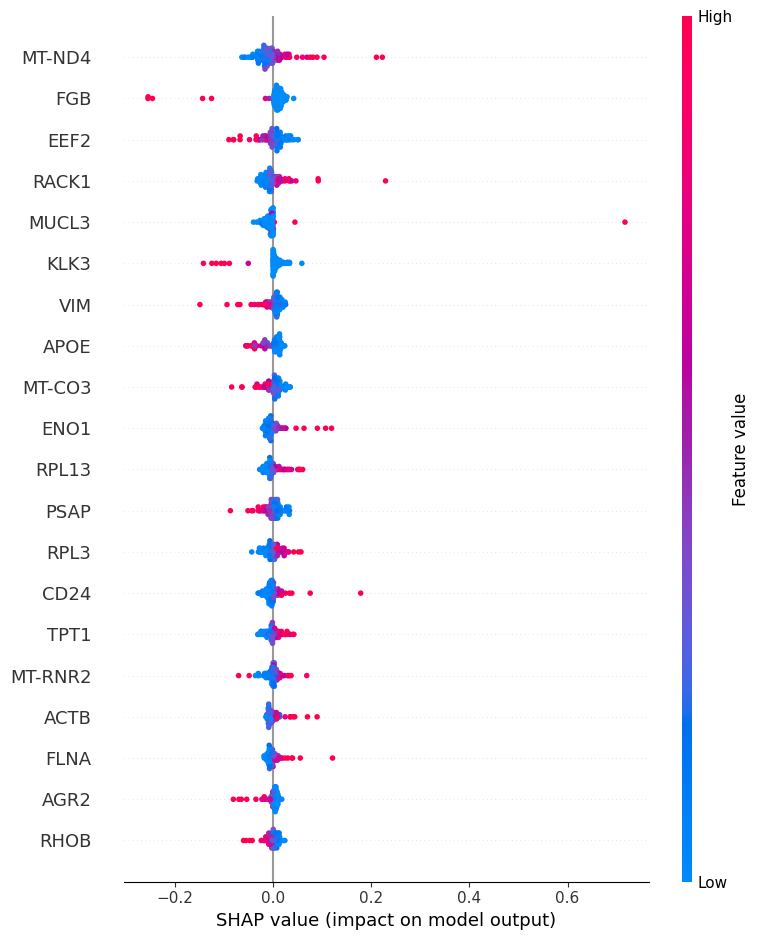

SHAP summary plot generated successfully.


In [15]:
import torch
import shap
from tqdm import tqdm
import numpy as np

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Definir la ruta del modelo guardado para la época 10
model_path = os.path.join(save_dir, 'model_epoch_10.pth')

# Crear una nueva instancia del modelo y cargar el estado guardado
model = VitalStatusClassifier(input_dim).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()  # Poner el modelo en modo evaluación

# Convertir los datos de miRNAs a un tensor, pero solo las primeras 100 muestras
X = df.iloc[:100, :-2].values  # Usando las primeras 100 filas y todas las columnas excepto las dos últimas
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# Crear un objeto SHAP explainer utilizando GradientExplainer con el modelo
explainer = shap.GradientExplainer(model, X_tensor)

# Calcular los valores SHAP para la salida del modelo directamente sobre X_tensor
shap_values = []
try:
    for i in tqdm(range(X_tensor.shape[0]), desc="Calculando valores SHAP"):
        shap_value = explainer.shap_values(X_tensor[i:i+1])
        shap_values.append(shap_value)
        print(f"SHAP values for instance {i}: {shap_value}")

    # Convertir la lista de valores SHAP a un numpy array
    shap_values_np = np.vstack(shap_values).squeeze()  # Eliminar la tercera dimensión
    print("Final SHAP values numpy array (shape):", shap_values_np.shape)

    # Usar los nombres de características originales
    feature_names_original = df.iloc[:, :-2].columns

    # Visualización de los valores SHAP para las características originales
    print("Generating SHAP summary plot...")
    shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)
    print("SHAP summary plot generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    print(f"SHAP values calculated so far: {shap_values}")


#detente

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Crear el modelo para cada pliegue
    model = VitalStatusClassifier(input_dim=X.shape[1]).to(device)

    # Definir el optimizador AdamW para cada pliegue
    optimizer = optim.AdamW(
        model.parameters(),
        lr=0.01,  # Tasa de aprendizaje
        betas=(0.9, 0.99),  # Coeficientes beta
        eps=1e-8,  # Valor pequeño para estabilidad numérica
        weight_decay=0.01,  # Regularización L2
        amsgrad=False  # Si deseas usar la variante AMSGrad
    )

    # Definir la función de pérdida
    criterion = nn.BCELoss().to(device)

    # Entrenar el modelo
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        label_preds = model(X_train_tensor)
        loss = criterion(label_preds, Y_train_tensor)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Vital Status Classifier across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=4, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [ ]:
# Visualización de UMAP de la última iteración de la segunda época (indexada como epoch 1)
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='feature_extractor', layer_name='fc1', title_suffix='for layer fc2 in FeatureExtractor at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='domain_classifier', layer_name='fc2', title_suffix='for layer fc2 in DomainClassifier at epoch 2, last iteration')
visualize_layer_umap(epoch=9, iteration=len(loader) - 1, module_name='label_predictor', layer_name='fc2', title_suffix='for layer fc2 in LabelPredictor at epoch 2, last iteration')


In [ ]:
# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 5 es epoch 4

# Obtener el modelo guardado al final de la época 5
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)


In [ ]:
import torch
import shap
from tqdm import tqdm
import numpy as np

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 10
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Convertir los datos de miRNAs a un tensor, pero solo las primeras 100 muestras
X = df.iloc[:, :-2].values  # Usando las primeras 100 filas y todas las columnas excepto las dos últimas
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Crear un modelo combinado que incluya tanto el FeatureExtractor como el LabelPredictor
class CombinedModel(torch.nn.Module):
    def __init__(self, feature_extractor, label_predictor):
        super(CombinedModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.label_predictor = label_predictor

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.label_predictor(features)
        return output

combined_model = CombinedModel(model.feature_extractor, model.label_predictor)

# Crear un objeto SHAP explainer utilizando GradientExplainer con el modelo combinado
explainer = shap.GradientExplainer(combined_model, X_tensor)

# Calcular los valores SHAP para la salida del LabelPredictor directamente sobre X_tensor
shap_values = []
try:
    for i in tqdm(range(X_tensor.shape[0]), desc="Calculando valores SHAP"):
        shap_value = explainer.shap_values(X_tensor[i:i+1])
        shap_values.append(shap_value)
        print(f"SHAP values for instance {i}: {shap_value}")

    # Convertir la lista de valores SHAP a un numpy array
    shap_values_np = np.vstack(shap_values).squeeze()  # Eliminar la tercera dimensión
    print("Final SHAP values numpy array (shape):", shap_values_np.shape)

    # Usar los nombres de características originales
    feature_names_original = df.iloc[:, :-2].columns

    # Visualización de los valores SHAP para las características originales
    print("Generating SHAP summary plot...")
    shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)
    print("SHAP summary plot generated successfully.")

except Exception as e:
    print(f"An error occurred: {e}")
    print(f"SHAP values calculated so far: {shap_values}")


In [ ]:
shap_values_np.shape

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=feature_names_original)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)
from sklearn.model_selection import train_test_split


# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Definir el número de pliegues
n_splits = 10  # Número de pliegues para la validación cruzada
skf = StratifiedKFold(n_splits=n_splits)

# Listas para almacenar resultados de AUC
auc_scores = []
fpr_list = []
tpr_list = []

# Validación cruzada estratificada
for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Convertir a tensores
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1).to(device)

    # Evaluar el modelo en el conjunto de prueba
    model.eval()
    with torch.no_grad():
        label_preds, _, _ = model(X_test_tensor)
        label_preds = label_preds.cpu().numpy()
        Y_test = Y_test_tensor.cpu().numpy()

    # Calcular el AUC
    auc_score = roc_auc_score(Y_test, label_preds)
    auc_scores.append(auc_score)

    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(Y_test, label_preds)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    print(f"AUC for fold {fold + 1}: {auc_score:.4f}")

# Promediar y graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_splits):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Fold {i+1} (AUC = {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Label Predictor across Folds')
plt.legend(loc="lower right")
plt.show()


In [ ]:
X_tensor.shape

**Analysis of the Model Outputs:**

The result you obtained confirms that the wrapper (`ModelWrapper`) is functioning correctly to return only the first output of the model, which corresponds to the vital status prediction. Below is the analysis of the results:

1. **Outputs of the model without the wrapper:**
   - **First output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the vital status prediction (`LabelPredictor`).
   - **Second output:** `tensor([[-0.2760,  0.1515, ...]], device='cuda:0')` with dimension `[10286, 33]` corresponds to the domain prediction (`DomainClassifier`).
   - **Third output:** `tensor([[ 2.3175e-01, ...]], device='cuda:0')` with dimension `[10286, 5000]` corresponds to some intermediate representation or features from the feature extractor (`FeatureExtractor`).

2. **Output of the model with the wrapper:**
   - **Output:** `tensor([[4.6149e-02], ... , [6.9630e-02]], device='cuda:0')` with dimension `[10286, 1]` corresponds to the first output of the model, which is the vital status prediction, as expected.

**Conclusion:**

The wrapper `ModelWrapper` is functioning as intended, returning only the first output of the full model, which is the vital status prediction. This is confirmed by comparing the dimensions:

- **Dimensions of all outputs:**
  - **First output:** `[10286, 1]`
  - **Second output:** `[10286, 33]`
  - **Third output:** `[10286, 5000]`

- **Dimension of the wrapped output:**
  - `[10286, 1]`

The dimension `[10286, 1]` of the wrapped output matches the dimension of the vital status prediction, confirming that the wrapper is correctly returning the first output.

This behavior ensures that when you calculate SHAP values using the wrapper, you are calculating SHAP values with respect to the vital status prediction (and not the other outputs of the model). This is exactly what you need to analyze how the input features influence the vital status prediction in your DANN model.




In [ ]:
asdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)
print(X_tensor.shape)

# Supongamos que la época 10 es la que te interesa (indexada como 9 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Obtener la salida del modelo
output = model(X_tensor)

# Si el modelo devuelve una tupla, selecciona la primera salida
if isinstance(output, tuple):
    output = output[0]

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(model, X_tensor)
shap_values = explainer.shap_values(X_tensor)
print(shap_values.shape)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Paso 1: Crear un objeto DeepExplainer para el modelo
explainer = shap.DeepExplainer(model.label_predictor, X_tensor)

# Paso 2: Calcular los valores SHAP utilizando el tensor de entrada X_tensor
shap_values = explainer.shap_values(X_tensor)

# Paso 3: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Verificar las salidas del modelo sin el wrapper
with torch.no_grad():
    all_outputs = model(X_tensor)
    print("Salidas del modelo (sin wrapper):", all_outputs)
    print("Dimensiones de todas las salidas:", [output.shape for output in all_outputs])

# Crear una clase wrapper para el modelo
# Esta clase `ModelWrapper` envuelve el modelo completo, pero en la función `forward`
# devuelve solo la primera salida del modelo (que corresponde a la predicción del estado vital).
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida (la predicción de la etiqueta de vitalidad)

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Verificar la salida del modelo con el wrapper
with torch.no_grad():
    wrapped_output = wrapped_model(X_tensor)
    print("Salida del modelo (con wrapper):", wrapped_output)
    print("Dimensión de la salida envuelta:", wrapped_output.shape)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.DeepExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Verifica las dimensiones de shap_values para asegurarte de que coincide con lo esperado
print("Dimensión de shap_values:", shap_values_np.shape)

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)



In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor,batch_size = 150)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
sdasdasdasdasdasdasdasd

In [ ]:
import shap
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch

# Preparar los datos
X = df.iloc[:, :-2].values  # Datos de miRNAs
Y = df['vital'].values  # Estado vital
panels = df['panel'].values  # Etiquetas del dominio (paneles)

# Convertir el estado vital a valores numéricos
label_encoder_vital = LabelEncoder()
Y = label_encoder_vital.fit_transform(Y)

# Convertir los datos a tensores y moverlos al dispositivo (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(1).to(device)

# Supongamos que la época 5 es la que te interesa (indexada como 4 en Python)
epoch_of_interest = 9  # Indexada desde 0, por lo que la época 10 es epoch 9

# Obtener el modelo guardado al final de la época 9
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
epoch, iteration = iteration_info

print(f"Modelo guardado al final de la época {epoch + 1}, iteración {iteration + 1}")
model.load_state_dict(model_state_dict)

# Asegúrate de que el modelo completo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para el modelo
class ModelWrapper(torch.nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)[0]  # Retornar solo la primera salida

# Instanciar la clase wrapper
wrapped_model = ModelWrapper(model)

# Paso 1: Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(wrapped_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Paso 2: Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Paso 3: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:
import shap
import torch

# Asumiendo que el modelo DANN ya ha sido definido y entrenado

# Instanciar y cargar el modelo como se hace en el código original
input_dim = X.shape[1]
num_domains = len(label_encoder_panel.classes_)
model = DANN(input_dim, num_domains).to(device)

# Cargar el modelo guardado al final de una época en particular
epoch_of_interest = 9  # Ejemplo, puedes ajustar la época de interés
iteration_info, model_state_dict = model_saver.get_models()[epoch_of_interest]
model.load_state_dict(model_state_dict)

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Crear una clase wrapper para obtener solo la salida del LabelPredictor
class LabelPredictorWrapper(torch.nn.Module):
    def __init__(self, model):
        super(LabelPredictorWrapper, self).__init__()
        self.label_predictor = model.label_predictor

    def forward(self, x):
        return self.label_predictor(x)

# Instanciar el wrapper
label_predictor_model = LabelPredictorWrapper(model)

# Usar GradientExplainer para calcular los valores SHAP basados en las características originales
explainer = shap.GradientExplainer(label_predictor_model, X_tensor)
shap_values = explainer.shap_values(X_tensor)

# Convertir los valores SHAP a numpy para visualización
shap_values_np = np.array(shap_values).squeeze()

# Visualización de SHAP
shap.summary_plot(shap_values_np, X, feature_names=df.iloc[:, :-2].columns)


In [ ]:

# Paso 2: Usar GradientExplainer para calcular los valores SHAP
explainer = shap.GradientExplainer(label_predictor_model,X)
shap_values = explainer.shap_values(X)

# Paso 3: Convertir los tensores de entrada y los valores SHAP a numpy para visualización
features_np = X.cpu().numpy()
shap_values_np = np.array(shap_values).squeeze()

# Paso 4: Visualización de SHAP con feature_names tomadas del DataFrame original
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns)

In [ ]:
features_np.shape

In [ ]:
len(df.iloc[:, :-2].columns)

In [ ]:
shap.summary_plot(shap_values_np, features_np, feature_names=df.iloc[:, :-2].columns,max_display=50 )


In [ ]:
shap_values_np.shape

In [ ]:

pd.DataFrame(shap_values_np, columns=df.iloc[:, :-2].columns,index=df.index)